In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from dynamic_regression import DynamicRegression

### Generate dummy dataset

In [4]:
rng = np.random.RandomState(100)
N = 500
sigma2_epsilon = 10.0**2
sigma2_eta1 = 0.5**2
sigma2_eta2 = 2.0**2

alpha1 = 5.0 + np.cumsum(np.sqrt(sigma2_eta1)*rng.randn(N))
alpha2 = 10.0 + np.cumsum(np.sqrt(sigma2_eta2)*rng.randn(N))

z1 = rng.randn(N)
z2 = rng.randn(N)
Z=[[z1, z2]]
y = z1*alpha1 + z2*alpha2 + np.sqrt(sigma2_epsilon)*rng.randn(N)

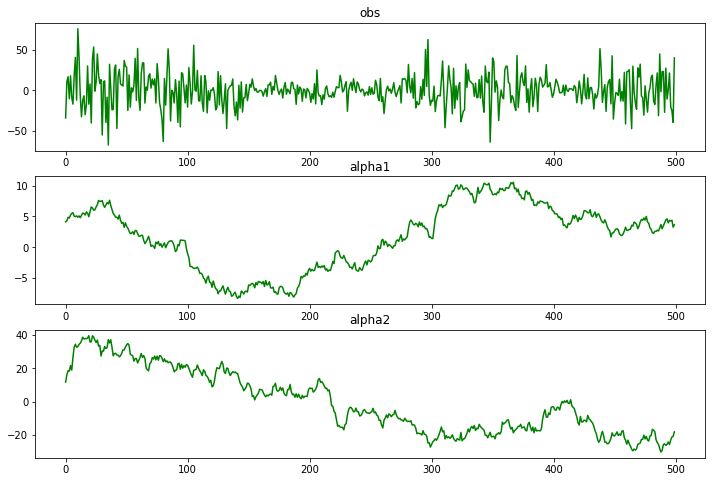

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(12,8))

for series, ax, title in zip([z1*alpha1 + z2*alpha2, alpha1, alpha2], axes, ['obs', 'alpha1', 'alpha2']):
    ax.plot(np.arange(N), series, color='green')
    ax.set_title(title)

In [15]:
dlm = DynamicRegression(y, Z)
dlmfit = dlm.fit(cov_type='robust')

In [16]:
dlmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:              DynamicRegression   Log Likelihood               -1916.917
Date:                Tue, 31 Jul 2018   AIC                           3839.835
Time:                        23:33:50   BIC                           3852.479
Sample:                             0   HQIC                          3844.796
                                - 500                                         
Covariance Type:               robust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
obs{i}_cov    92.7703      6.438     14.410      0.000      80.152     105.389
state0_var     0.4141      0.215      1.926      0.054      -0.007       0.835
state1_var     3.8627      1.068      3.618      0.000       1.770       5.955
===================================================================================
Ljung-Box (Q):                       35.66   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.67   Prob(JB):                         0.67
Heteroskedasticity (H):               0.91   Skew:                             0.03
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

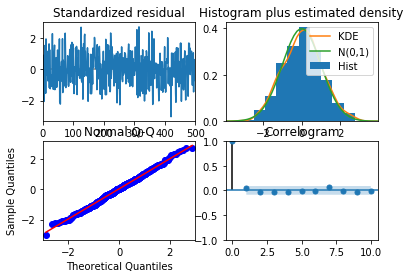

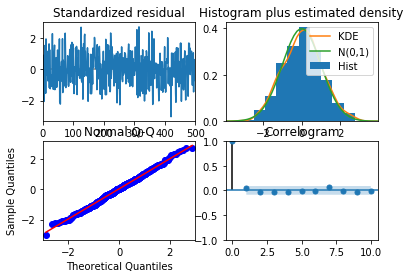

In [17]:
dlmfit.plot_diagnostics()

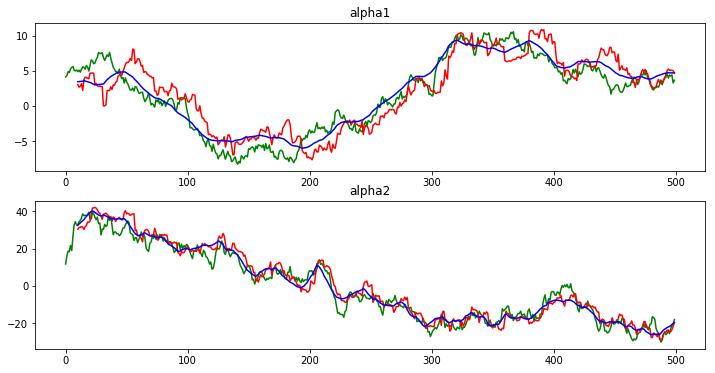

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12,6))
iterator = zip(
    ['alpha1', 'alpha2'],
    [alpha1, alpha2], 
    [dlmfit.filtered_state[0], dlmfit.filtered_state[1]], 
    [dlmfit.smoothed_state[0], dlmfit.smoothed_state[1]],             
    axes
)
for title, true, filtered, smoothed, ax in iterator:
    ax.plot(np.arange(N), true, color='green')
    ax.set_title(title)
    if len(filtered)>0:
        ax.plot(np.arange(N)[10:], filtered[10:], color='red')
        ax.plot(np.arange(N)[10:], smoothed[10:], color='blue')